# ARIMA Model for stock price prediction (Short Term)

RMSE: 2.82


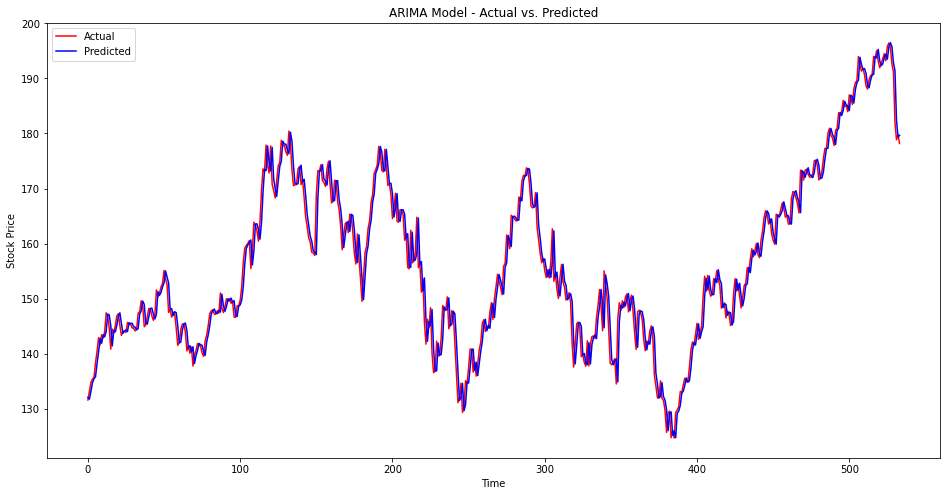

In [32]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fetching the stock data using yfinance
ticker = yf.Ticker('AAPL')
df = ticker.history(interval='1d', start='2013-01-01')

# Selecting the 'Close' column for prediction
data = df['Close'].values

# Splitting the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Function to fit ARIMA model and make predictions
def fit_arima(train_data, order):
    history = [x for x in train_data]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    return predictions

# Define the order for ARIMA model (p, d, q) (5, 1, 0)
p, d, q = 2, 2, 2

# Fit ARIMA model and make predictions
predictions = fit_arima(train, (p, d, q))

# Calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# Plotting the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(test, color='red', label='Actual')
plt.plot(predictions, color='blue', label='Predicted')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [23]:
len(predictions)

282

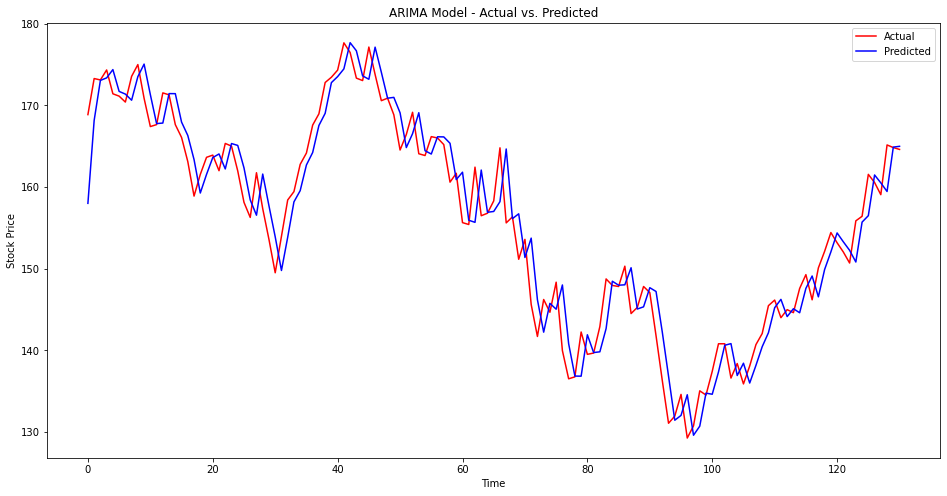

In [33]:
# Plotting the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(test[150:281], color='red', label='Actual')
plt.plot(predictions[150:281], color='blue', label='Predicted')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

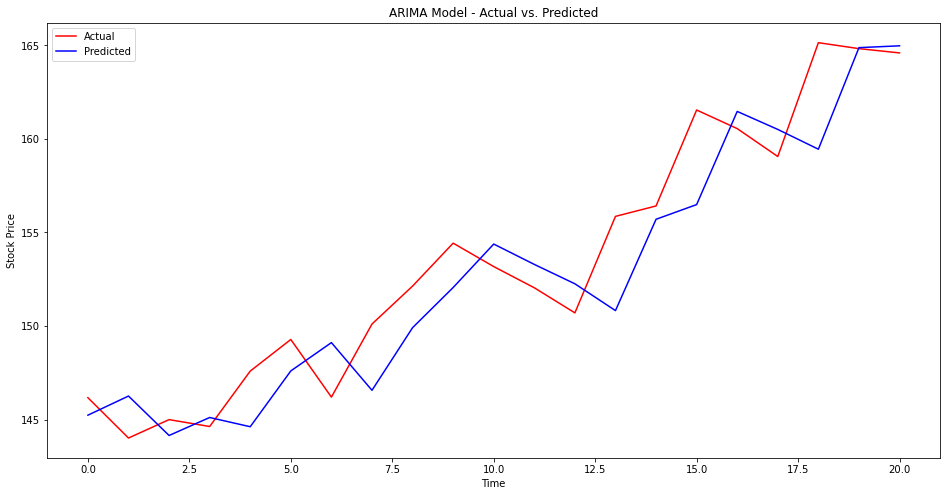

In [34]:
# Plotting the actual and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(test[260:281], color='red', label='Actual')
plt.plot(predictions[260:281], color='blue', label='Predicted')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
# !pip install pmdarima

# Identifying P D Q values

In [23]:
from pmdarima.arima import auto_arima

model = auto_arima(data, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13272.024, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13297.871, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13278.965, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13277.082, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13299.935, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13273.834, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13273.839, Time=0.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13274.719, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13276.380, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13275.689, Time=1.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13276.088, Time=0.15 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.610 seconds


# Grid Search Method

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Fetching the stock data using yfinance
ticker = yf.Ticker('AAPL')
df = ticker.history(interval='1d', start='2022-03-01')

# Selecting the 'Close' column for prediction
data = df['Close'].values

# Splitting the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Function to fit ARIMA model and make predictions
def fit_arima(train_data, order):
    history = [x for x in train_data]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d, and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                mse = fit_arima(train, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                    print('ARIMA=%s RMSE=%.3f' % (order, mse) ," Improved")
                else:
                    print('ARIMA=%s RMSE=%.3f' % (order, mse))
    print('Best ARIMA=%s RMSE=%.3f' % (best_cfg, best_score))

# Define the range of p, d, and q values for hyperparameter tuning
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Perform hyperparameter tuning and evaluate ARIMA models
evaluate_models(df, p_values, d_values, q_values)

ARIMA=(0, 0, 0) RMSE=29.424  Improved
ARIMA=(0, 0, 1) RMSE=15.302  Improved
ARIMA=(0, 0, 2) RMSE=10.216  Improved
ARIMA=(0, 1, 0) RMSE=2.331  Improved
ARIMA=(0, 1, 1) RMSE=2.353
ARIMA=(0, 1, 2) RMSE=2.369
ARIMA=(1, 0, 0) RMSE=2.398
ARIMA=(1, 0, 1) RMSE=2.410
ARIMA=(1, 0, 2) RMSE=2.415
ARIMA=(1, 1, 0) RMSE=2.349
ARIMA=(1, 1, 1) RMSE=2.366
ARIMA=(1, 1, 2) RMSE=2.363
ARIMA=(2, 0, 0) RMSE=2.408
ARIMA=(2, 0, 1) RMSE=2.356
ARIMA=(2, 0, 2) RMSE=2.373
ARIMA=(2, 1, 0) RMSE=2.369
ARIMA=(2, 1, 1) RMSE=2.372
ARIMA=(2, 1, 2) RMSE=2.355
Best ARIMA=(0, 1, 0) RMSE=2.331


# Grid Search with multiple stock tickers

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define a list of stock tickers
ticker_symbols = ['AAPL', 'MSFT', 'ORCL']  # Add more stock symbols as needed

# Function to fetch stock data and perform ARIMA hyperparameter tuning
def hyperparameter_tuning(ticker_symbol):
    # Fetching the stock data using yfinance
    ticker = yf.Ticker(ticker_symbol)
    df = ticker.history(interval='1d', start='2022-03-01')

    # Selecting the 'Close' column for prediction
    data = df['Close'].values

    # Splitting the data into training and testing sets
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Function to fit ARIMA model and make predictions
    def fit_arima(train_data, order):
        history = [x for x in train_data]
        predictions = []
        for t in range(len(test)):
            model = ARIMA(history, order=order)
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(test[t])
        # calculate out of sample error
        rmse = sqrt(mean_squared_error(test, predictions))
        return rmse

    # Evaluate combinations of p, d, and q values for an ARIMA model
    def evaluate_models(dataset, p_values, d_values, q_values):
        dataset = dataset.astype('float32')
        best_score, best_cfg = float("inf"), None
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    order = (p, d, q)
                    mse = fit_arima(train, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        print(f'{ticker_symbol} ARIMA={order} RMSE={mse:.3f} Improved')
                    else:
                        print(f'{ticker_symbol} ARIMA={order} RMSE={mse:.3f}')
        print(f'{ticker_symbol} Best ARIMA={best_cfg} RMSE={best_score:.3f}')

    # Define the range of p, d, and q values for hyperparameter tuning
    p_values = range(0, 3)
    d_values = range(0, 3)
    q_values = range(0, 3)

    # Perform hyperparameter tuning and evaluate ARIMA models for the current stock
    evaluate_models(df, p_values, d_values, q_values)

# Iterate through the list of stock tickers and perform hyperparameter tuning
for ticker_symbol in ticker_symbols:
    hyperparameter_tuning(ticker_symbol)


AAPL ARIMA=(0, 0, 0) RMSE=28.455 Improved


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AAPL ARIMA=(0, 0, 1) RMSE=14.782 Improved


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AAPL ARIMA=(0, 0, 2) RMSE=9.823 Improved
AAPL ARIMA=(0, 1, 0) RMSE=2.372 Improved
AAPL ARIMA=(0, 1, 1) RMSE=2.391
AAPL ARIMA=(0, 1, 2) RMSE=2.399
AAPL ARIMA=(0, 2, 0) RMSE=3.085
AAPL ARIMA=(0, 2, 1) RMSE=2.381
AAPL ARIMA=(0, 2, 2) RMSE=2.399
AAPL ARIMA=(1, 0, 0) RMSE=2.403
AAPL ARIMA=(1, 0, 1) RMSE=2.414
AAPL ARIMA=(1, 0, 2) RMSE=2.415
AAPL ARIMA=(1, 1, 0) RMSE=2.388
AAPL ARIMA=(1, 1, 1) RMSE=2.401
AAPL ARIMA=(1, 1, 2) RMSE=2.397
AAPL ARIMA=(1, 2, 0) RMSE=2.827
AAPL ARIMA=(1, 2, 1) RMSE=2.396
AAPL ARIMA=(1, 2, 2) RMSE=2.331 Improved
AAPL ARIMA=(2, 0, 0) RMSE=2.412


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AAPL ARIMA=(2, 0, 1) RMSE=2.362


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

AAPL ARIMA=(2, 0, 2) RMSE=2.377
AAPL ARIMA=(2, 1, 0) RMSE=2.398
AAPL ARIMA=(2, 1, 1) RMSE=2.401


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

AAPL ARIMA=(2, 1, 2) RMSE=2.380
AAPL ARIMA=(2, 2, 0) RMSE=2.670
AAPL ARIMA=(2, 2, 1) RMSE=2.409
AAPL ARIMA=(2, 2, 2) RMSE=2.356
AAPL Best ARIMA=(1, 2, 2) RMSE=2.331
MSFT ARIMA=(0, 0, 0) RMSE=60.037 Improved


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSFT ARIMA=(0, 0, 1) RMSE=31.532 Improved


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSFT ARIMA=(0, 0, 2) RMSE=20.429 Improved
MSFT ARIMA=(0, 1, 0) RMSE=4.776 Improved
MSFT ARIMA=(0, 1, 1) RMSE=4.796
MSFT ARIMA=(0, 1, 2) RMSE=4.705 Improved
MSFT ARIMA=(0, 2, 0) RMSE=6.936
MSFT ARIMA=(0, 2, 1) RMSE=4.817
MSFT ARIMA=(0, 2, 2) RMSE=4.835
MSFT ARIMA=(1, 0, 0) RMSE=4.792
MSFT ARIMA=(1, 0, 1) RMSE=4.821
MSFT ARIMA=(1, 0, 2) RMSE=4.716
MSFT ARIMA=(1, 1, 0) RMSE=4.791
MSFT ARIMA=(1, 1, 1) RMSE=4.755
MSFT ARIMA=(1, 1, 2) RMSE=4.717
MSFT ARIMA=(1, 2, 0) RMSE=6.278
MSFT ARIMA=(1, 2, 1) RMSE=4.830
MSFT ARIMA=(1, 2, 2) RMSE=4.825
MSFT ARIMA=(2, 0, 0) RMSE=4.814


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSFT ARIMA=(2, 0, 1) RMSE=4.821


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

MSFT ARIMA=(2, 0, 2) RMSE=4.724
MSFT ARIMA=(2, 1, 0) RMSE=4.704 Improved
MSFT ARIMA=(2, 1, 1) RMSE=4.714


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

MSFT ARIMA=(2, 1, 2) RMSE=4.684 Improved
MSFT ARIMA=(2, 2, 0) RMSE=5.657
MSFT ARIMA=(2, 2, 1) RMSE=4.759
MSFT ARIMA=(2, 2, 2) RMSE=4.818
MSFT Best ARIMA=(2, 1, 2) RMSE=4.684
ORCL ARIMA=(0, 0, 0) RMSE=33.128 Improved


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ORCL ARIMA=(0, 0, 1) RMSE=17.714 Improved


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ORCL ARIMA=(0, 0, 2) RMSE=10.825 Improved
ORCL ARIMA=(0, 1, 0) RMSE=2.740 Improved
ORCL ARIMA=(0, 1, 1) RMSE=2.754
ORCL ARIMA=(0, 1, 2) RMSE=2.758
ORCL ARIMA=(0, 2, 0) RMSE=3.876
ORCL ARIMA=(0, 2, 1) RMSE=2.765
ORCL ARIMA=(0, 2, 2) RMSE=2.773


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ORCL ARIMA=(1, 0, 0) RMSE=2.743


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ORCL ARIMA=(1, 0, 1) RMSE=2.758


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ORCL ARIMA=(1, 0, 2) RMSE=2.760
ORCL ARIMA=(1, 1, 0) RMSE=2.753


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ORCL ARIMA=(1, 1, 1) RMSE=2.760


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ORCL ARIMA=(1, 1, 2) RMSE=2.784
ORCL ARIMA=(1, 2, 0) RMSE=3.496
ORCL ARIMA=(1, 2, 1) RMSE=2.772


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ORCL ARIMA=(1, 2, 2) RMSE=2.802


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ORCL ARIMA=(2, 0, 0) RMSE=2.758


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\st

ORCL ARIMA=(2, 0, 1) RMSE=2.801


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels

C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

ORCL ARIMA=(2, 0, 2) RMSE=2.776
ORCL ARIMA=(2, 1, 0) RMSE=2.759


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ORCL ARIMA=(2, 1, 1) RMSE=2.768


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Conver

ORCL ARIMA=(2, 1, 2) RMSE=2.804
ORCL ARIMA=(2, 2, 0) RMSE=3.266


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ORCL ARIMA=(2, 2, 1) RMSE=2.777


C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Shemeen62\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ORCL ARIMA=(2, 2, 2) RMSE=2.811
ORCL Best ARIMA=(0, 1, 0) RMSE=2.740
